# Task 1: Diabetes Disease Prediction

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [3]:
db = pd.read_csv('diabetes.csv')
db


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Preprocessing

In [5]:
db.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
db.shape

(768, 9)

In [12]:
db.drop_duplicates()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
db.size

6912

In [8]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
db.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
db.sample(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
139,5,105,72,29,325,36.9,0.159,28,0
675,6,195,70,0,0,30.9,0.328,31,1
309,2,124,68,28,205,32.9,0.875,30,1
686,3,130,64,0,0,23.1,0.314,22,0
700,2,122,76,27,200,35.9,0.483,26,0
39,4,111,72,47,207,37.1,1.390,56,1
163,2,100,64,23,0,29.7,0.368,21,0
473,7,136,90,0,0,29.9,0.210,50,0
683,4,125,80,0,0,32.3,0.536,27,1
325,1,157,72,21,168,25.6,0.123,24,0


In [11]:
db.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
db.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
db.Pregnancies.value_counts()[0]


111

In [15]:
db.Glucose.value_counts()[0]


5

In [16]:
db.BloodPressure.value_counts()[0]


35

In [17]:
db.SkinThickness.value_counts()[0]


227

In [18]:
db.Insulin.value_counts()[0]


374

In [19]:
db.BMI.value_counts()[0]


11

In [22]:
db['Pregnancies']=db['Pregnancies'].replace(0,db['Pregnancies'].mean())
db['Glucose']=db['Glucose'].replace(0,db['Glucose'].mean())
db['BloodPressure']=db['BloodPressure'].replace(0,db['BloodPressure'].mean())
db['SkinThickness']=db['SkinThickness'].replace(0,db['SkinThickness'].mean())
db['Insulin']=db['Insulin'].replace(0,db['Insulin'].mean())
db['BMI']=db['BMI'].replace(0,db['BMI'].mean())


In [23]:
db.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
db['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [24]:
# Encoding categorical variables
cat_values=[]
num_values=[]
for columns in db.columns:
    if db[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        num_values.append(columns)
        

In [25]:
cat_values

['Outcome']

In [26]:
num_values

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [28]:
db['Outcome'].unique()


array([1, 0], dtype=int64)

In [29]:
#Scaling numerical variables
ss=StandardScaler()
db[num_values]=ss.fit_transform(db[num_values])
db.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.536251,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1
1,-1.140353,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,0
2,1.206893,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1
3,-1.140353,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,0
4,-0.186348,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1


# Exploratory Data Analysis

Text(0, 0.5, 'counts')

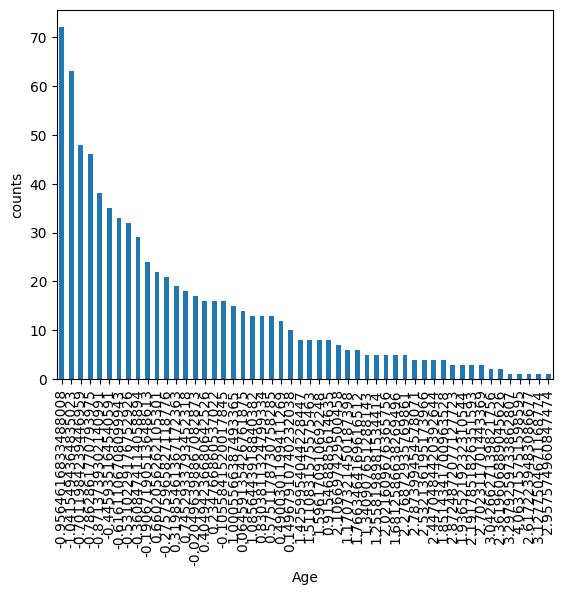

In [30]:
# Which age group is most effected by diabetes

db['Age'].value_counts().plot.bar()
plt.xlabel('Age')
plt.ylabel('counts')


Text(0, 0.5, 'counts')

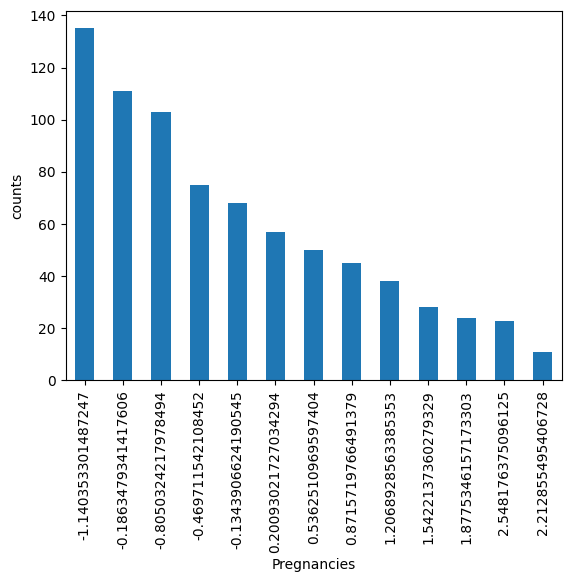

In [52]:
db['Pregnancies'].value_counts().plot.bar()
plt.xlabel('Pregnancies')
plt.ylabel('counts')


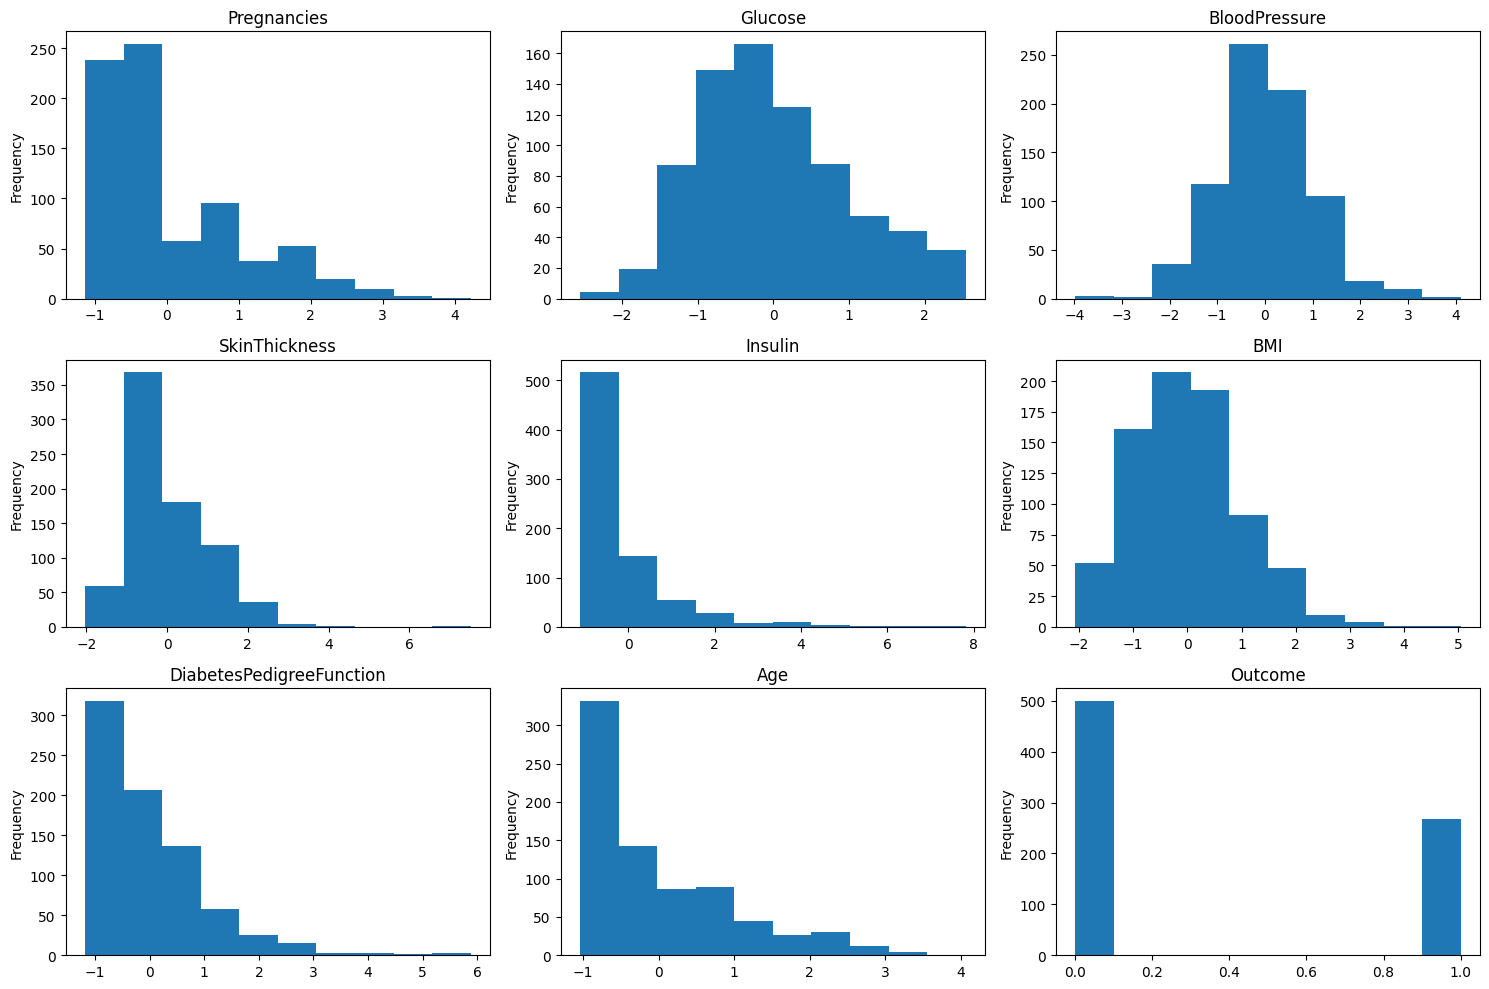

In [33]:
int_vars=db

fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(int_vars):
    db[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)
   
plt.tight_layout()
plt.show()


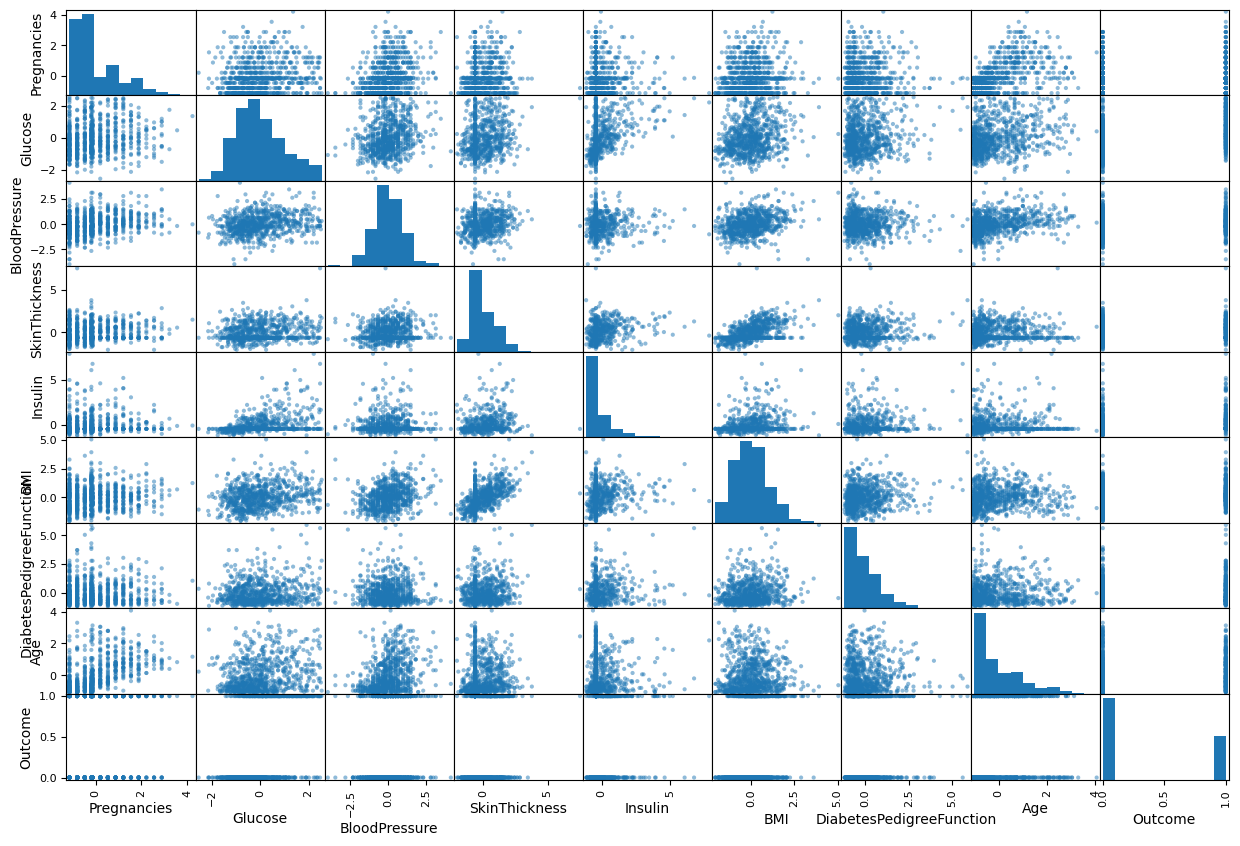

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(db, figsize=(15,10))
plt.show()


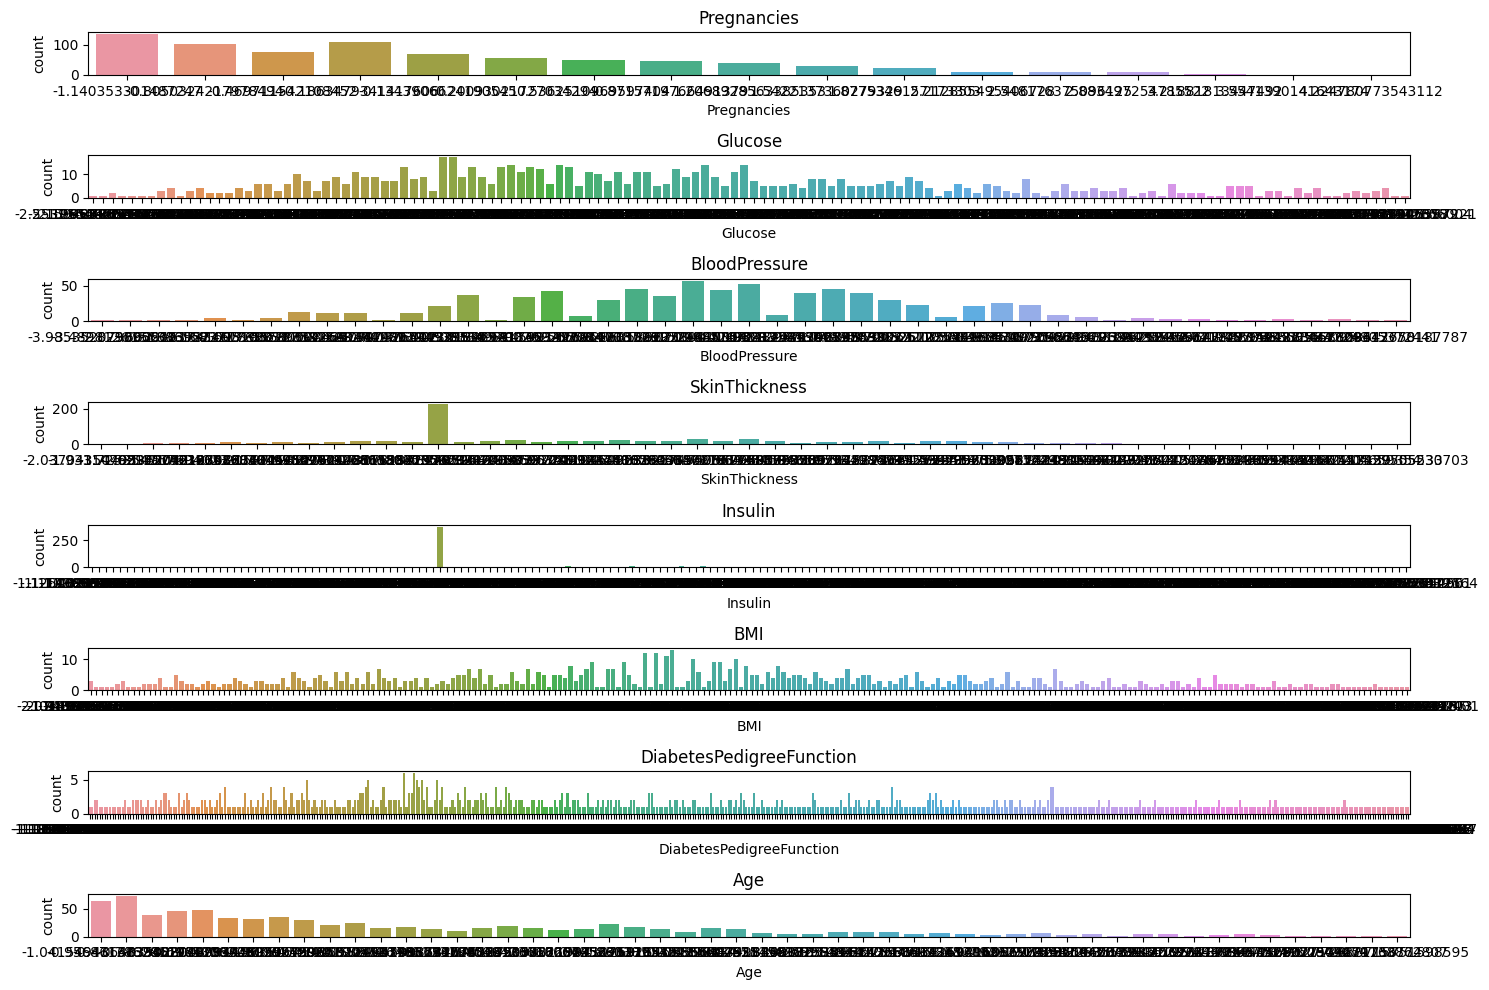

In [38]:
int_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

fig,axs=plt.subplots(nrows=8,ncols=1,figsize=(15,10))
axs=axs.flatten()
for i, var in enumerate(int_vars):
    sns.countplot(x=var,data=db,ax=axs[i])
    axs[i].set_title(var)
   
plt.tight_layout()
plt.show()


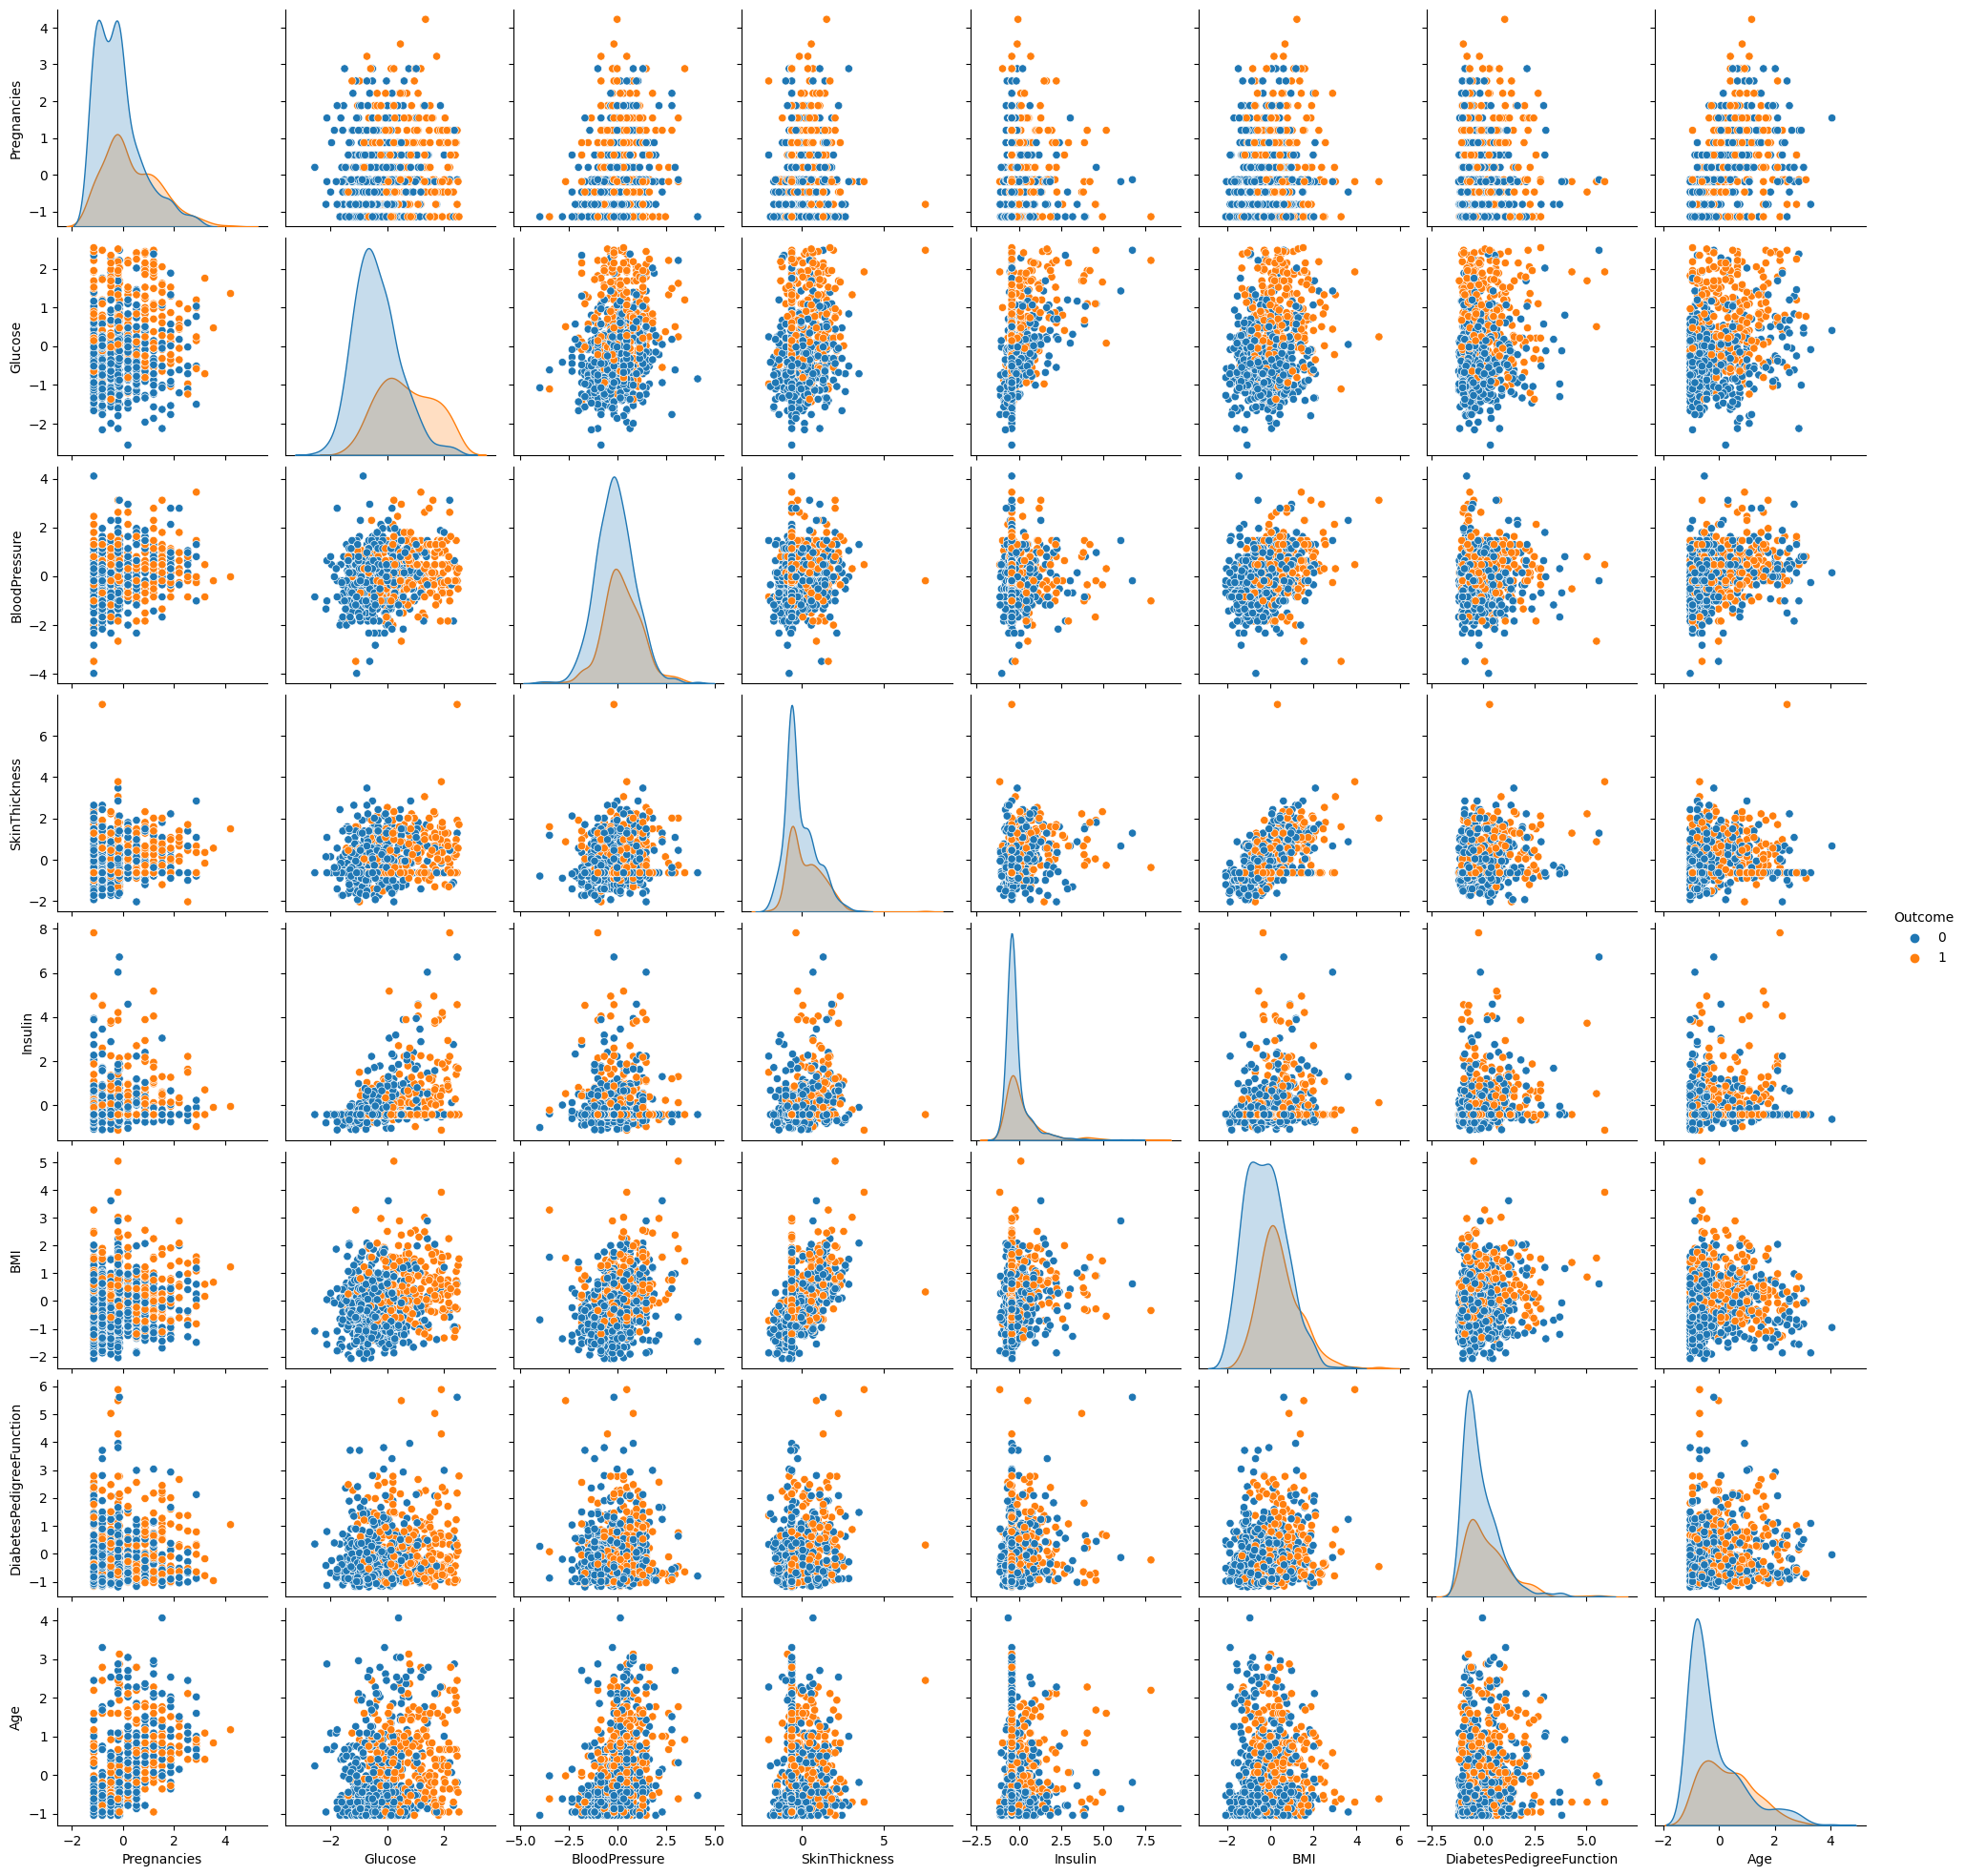

In [39]:
sns.pairplot(data=db, hue='Outcome')
plt.show()


In [78]:
db.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.151895,0.259274,0.051235,-0.001157,0.099267,-0.004010,0.535006,0.246516
Glucose,0.151895,1.000000,0.220946,0.149026,0.394778,0.234041,0.118236,0.268602,0.492908
BloodPressure,0.259274,0.220946,1.000000,0.145294,0.017952,0.286508,0.015067,0.334903,0.166131
SkinThickness,0.051235,0.149026,0.145294,1.000000,0.303747,0.548198,0.134284,0.013831,0.173868
Insulin,-0.001157,0.394778,0.017952,0.303747,1.000000,0.225814,0.180001,0.038798,0.208749
BMI,0.099267,0.234041,0.286508,0.548198,0.225814,1.000000,0.138545,0.035865,0.313035
DiabetesPedigreeFunction,-0.004010,0.118236,0.015067,0.134284,0.180001,0.138545,1.000000,0.047289,0.184969
Age,0.535006,0.268602,0.334903,0.013831,0.038798,0.035865,0.047289,1.000000,0.242702
Outcome,0.246516,0.492908,0.166131,0.173868,0.208749,0.313035,0.184969,0.242702,1.000000


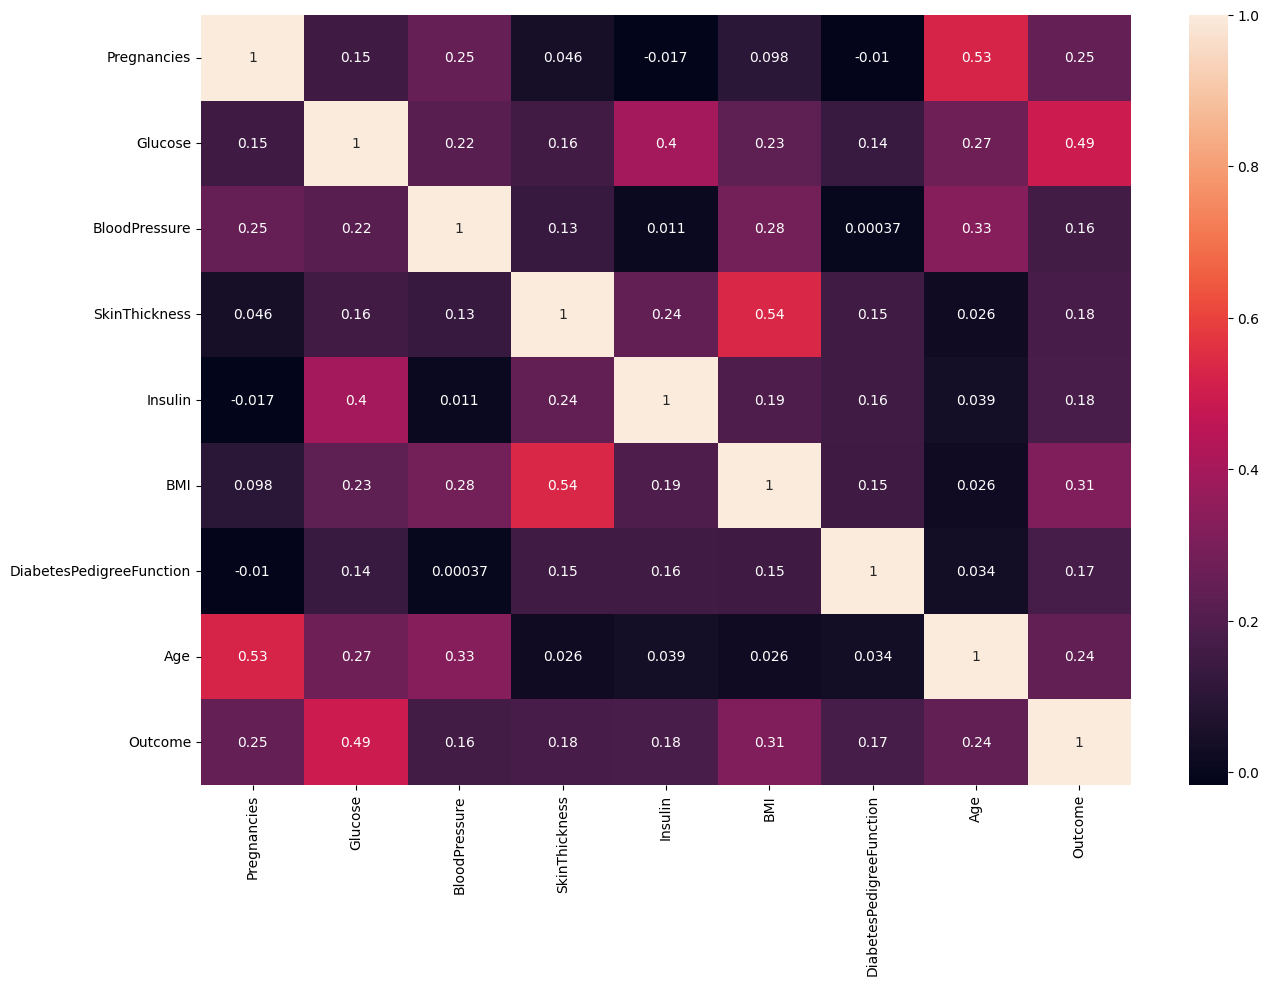

In [41]:
# Analyzing relations between variables

plt.figure(figsize=(15,10))
sns.heatmap(db.corr(),fmt='.2g',annot=True)
plt.show()


In [42]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
outlier_col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']


In [46]:
def remove_outlier_iqr(data):
    Q1=np.percentile(data,25)
    Q3=np.percentile(data,75)
    
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    print(len(data))
    
    for i in range(len(data)):
        if data[i]>upper_bound:
            data[i]=upper_bound
        elif data[i]<lower_bound:
            data[i]=lower_bound
        else:
            pass
        
    return data

    

In [48]:
for col in outlier_col:
    print(col)
    db[col]=remove_outlier_iqr(db[col])
    

Pregnancies
768
Glucose
768
BloodPressure
768
SkinThickness
768
Insulin
768
BMI
768
DiabetesPedigreeFunction
768
Age
768


c:\users\bijin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\bijin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
target_name='Outcome'
y=db[target_name]
x=db.drop(target_name,axis=1)


In [50]:
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.536251,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-1.140353,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.206893,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-1.140353,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-0.186348,0.503626,-2.663916,0.872057,0.530423,1.549899,2.199020,-0.020496


In [51]:
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [56]:
db.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,-0.184897,-0.360868,-0.119986,-0.134049,-0.235531,-0.231256,-0.155875,-0.179185
1,0.317432,0.673262,0.217075,0.211070,-0.015427,0.405653,0.178628,0.324299


In [57]:
# Total no. of positive cases present according to the data given:
db['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

Negative (0): 500
Positive (0): 268


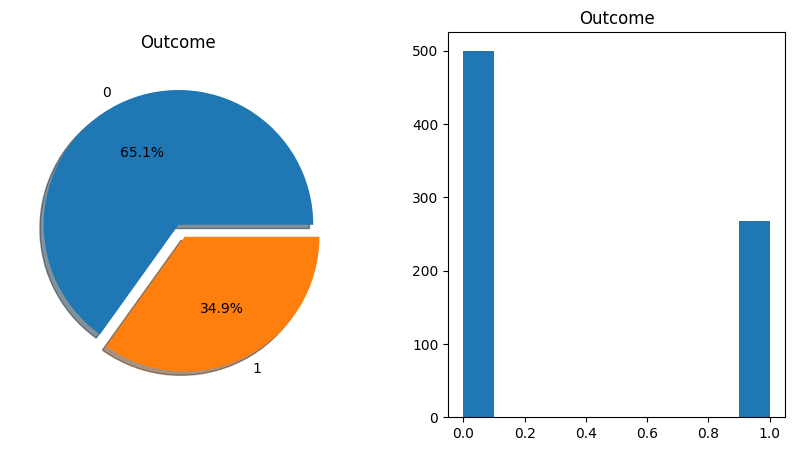

In [77]:
f,ax=plt.subplots(1,2,figsize=(10,5))
db['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')

db.hist('Outcome',ax=ax[1])
ax[1].set_title('Outcome')
N,P=db['Outcome'].value_counts()
print('Negative (0):',N)
print('Positive (0):',P)
plt.grid()
plt.show()


# Model Implementation

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [81]:
X=db.drop('Outcome',axis=1)
Y=db['Outcome']


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
223,0.871572,0.668012,-1.012121,0.664264,0.766932,-0.531343,0.649699,2.361961
203,-0.805032,-0.745708,-0.186224,-1.101975,-0.802627,-1.753891,-0.715395,-0.531023
112,-1.140353,-1.074480,0.309315,0.768161,-0.877880,-0.182044,-0.845260,-0.871374
507,-1.140353,0.273486,-1.012121,-0.374700,0.551924,-0.560452,0.664800,-1.041549
577,-0.805032,-0.121041,0.639674,-0.630654,-0.417768,1.520791,0.667820,-1.041549
...,...,...,...,...,...,...,...,...
440,-0.186348,2.213242,2.621827,-0.166907,-0.417768,0.269134,-0.111371,0.660206
165,0.536251,-0.581322,0.144135,-0.894183,0.401418,-0.371248,0.755403,0.660206
7,1.877535,-0.219673,-0.260103,-0.630654,-0.417768,0.414676,-1.020427,-0.360847
219,0.200930,-0.318304,-0.516583,-0.630654,-0.417768,0.778529,-0.636871,0.660206


In [83]:
Y_train

223    0
203    0
112    0
507    0
577    1
      ..
440    1
165    1
7      0
219    1
326    1
Name: Outcome, Length: 614, dtype: int64

In [84]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
370,-0.469712,1.687206,0.804853,2.222711,0.857513,0.865854,2.199020,-0.701198
388,0.200930,0.733767,0.804853,-0.063011,0.857513,-0.065611,-0.060029,2.106697
611,-0.469712,1.720084,-1.177301,-0.478597,0.809934,0.065376,0.365808,0.234767
550,-1.140353,-0.186795,-0.186224,0.144782,-0.417768,-0.735101,-0.809018,-1.041549
232,-1.140353,-1.403253,0.639674,-0.166907,-0.877880,-1.026184,0.335607,-0.956462
...,...,...,...,...,...,...,...,...
299,1.206893,-0.318304,-0.021044,-0.630654,-0.417768,-1.288159,1.111777,2.106697
754,1.206893,1.062539,0.474494,0.560368,-0.417768,-0.007394,-0.087210,1.000557
303,0.200930,-0.219673,2.126289,-0.630654,-0.417768,2.590520,-0.793918,-0.445935
145,-0.186348,-0.647077,0.226725,-0.374700,-0.417768,-0.066691,0.302385,-1.041549


In [85]:
Y_test

370    1
388    1
611    1
550    0
232    0
      ..
299    0
754    1
303    1
145    0
556    0
Name: Outcome, Length: 154, dtype: int64

### KNN

In [188]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
predicted_train_knn=(knn.predict(X_train))
predicted_test_knn=(knn.predict(X_test))
knn

KNeighborsClassifier(n_neighbors=6)

### Naive Bayes

In [189]:
nba=GaussianNB()
nba.fit(X_train,Y_train)
predicted_train_naive=(nba.predict(X_train))
predicted_test_naive=(nba.predict(X_test))
nba

GaussianNB()

### Decision Tree

In [190]:
dst=DecisionTreeClassifier(random_state=35,max_depth=5)
dst.fit(X_train,Y_train)
predicted_train_decisiontree=(dst.predict(X_train))
predicted_test_decisiontree=(dst.predict(X_test))
dst

DecisionTreeClassifier(max_depth=5, random_state=35)

### RandomForest

In [191]:
rf=RandomForestClassifier(criterion='entropy')
rf.fit(X_train,Y_train)
predicted_train_randomforest=(rf.predict(X_train))
predicted_test_randomforest=(rf.predict(X_test))
rf

RandomForestClassifier(criterion='entropy')

# Model Evaluation

### For KNN classifier

In [90]:
# accuracy on training data
acc_train=knn.score(X_train,Y_train)
print(" Accuracy on train data set is: ",acc_train)


 Accuracy on train data set is:  0.8127035830618893


In [91]:
# accuracy on test data
acc_test=knn.score(X_test,Y_test)
print(" Accuracy on test data set is: ",acc_test)


 Accuracy on test data set is:  0.7077922077922078


In [100]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds=knn.predict(X_train)
mae=mean_absolute_error(Y_train,y_preds)
mae


0.18729641693811075

In [99]:
from sklearn.metrics import mean_absolute_error

y_preds=knn.predict(X_test)
mae=mean_absolute_error(Y_test,y_preds)
mae


0.2922077922077922

In [101]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds=knn.predict(X_train)
mse=mean_squared_error(Y_train,y_preds)
mse


0.18729641693811075

In [103]:
y_preds=knn.predict(X_test)
mse=mean_squared_error(Y_test,y_preds)
mse


0.2922077922077922

In [92]:
from sklearn.metrics import precision_score
# precision on training data prediction
precision_train=precision_score(Y_train,predicted_train_knn)
print("precision score of training set is: ",precision_train)


precision score of training set is:  0.8175675675675675


In [93]:
# precision on test data predicition
precision_test=precision_score(Y_test,predicted_test_knn)
print("precision score of test set is: ",precision_test)


precision score of test set is:  0.7058823529411765


In [94]:
# recall on training data predicition
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_knn)
print("Recall score of training set is: ",recall_train)


Recall score of training set is:  0.5789473684210527


In [95]:
# recall on test set
recall_test=recall_score(Y_test,predicted_test_knn)
print("Recall score of test set is: ",recall_test)


Recall score of test set is:  0.4067796610169492


In [96]:
# f1 score on training data prediction
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_knn)
print("f1 score of training set is: ",f1_train)


f1 score of training set is:  0.6778711484593838


In [97]:
# f1 score on test data prediction
f1_test=f1_score(Y_test,predicted_test_knn)
print("f1 score of test set is: ",f1_test)


f1 score of test set is:  0.5161290322580646


In [104]:
# ROC AUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_knn)
print(" auc_roc score on training set is: ",auc_score_train)


 auc_roc score on training set is:  0.756140350877193


In [105]:
# ROC AUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_knn)
print(" auc_roc score on test set is: ",auc_score_test)


 auc_roc score on test set is:  0.6507582515611062


In [155]:
knn_pred=knn.predict(X_test)
knn_pred.shape

(154,)

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,knn_pred)
cm

array([[85, 10],
       [35, 24]], dtype=int64)

<AxesSubplot:>

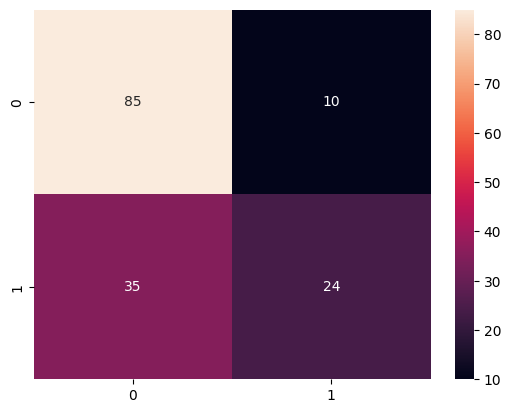

In [158]:
sns.heatmap(confusion_matrix(Y_test,knn_pred),annot=True,fmt="d")

In [159]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]
TP,FP,FN,TN


(85, 10, 35, 24)

In [160]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(Y_test,knn_pred)


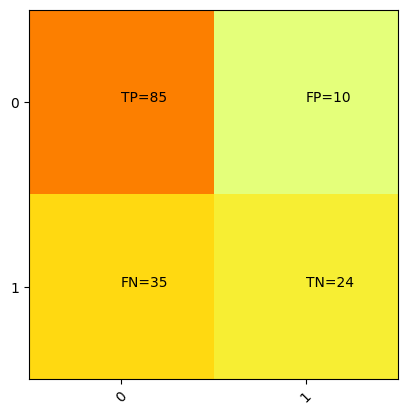

In [161]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['0','1']
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s=[['TP','FP'],['FN','TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
plt.show()


In [162]:
auc=roc_auc_score(Y_test,knn_pred)
auc


0.6507582515611062

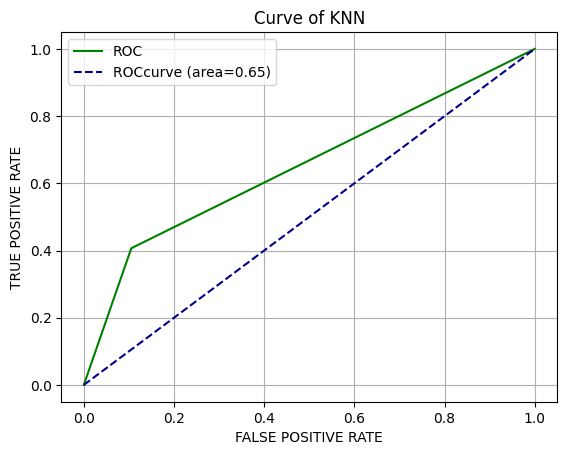

In [163]:
fpr,tpr,thresholds=roc_curve(Y_test,knn_pred)
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of KNN')
plt.legend()
plt.grid()
plt.show()


## For Naive Bayes

In [107]:
#accuracy on train data set
acc_train=nba.score(X_train,Y_train)
print("acccuracy on train data set is : ",acc_train)


acccuracy on train data set is :  0.7752442996742671


In [108]:
# accuracy on test data set
acc_test=nba.score(X_test,Y_test)
print("acccuracy on test data set is : ",acc_test)


acccuracy on test data set is :  0.7337662337662337


In [117]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds=nba.predict(X_train)
mae=mean_absolute_error(Y_train,y_preds)
mae


0.2247557003257329

In [118]:
y_preds=nba.predict(X_test)
mae=mean_absolute_error(Y_test,y_preds)
mae


0.2662337662337662

In [119]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds=nba.predict(X_train)
mse=mean_squared_error(Y_train,y_preds)
mse


0.2247557003257329

In [120]:
y_preds=nba.predict(X_test)
mse=mean_squared_error(Y_test,y_preds)
mse

0.2662337662337662

In [109]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_naive)
print(" precision on training data set is: ",precision_train)


 precision on training data set is:  0.6766169154228856


In [110]:
# precision on test data set
from sklearn.metrics import precision_score
precision_test=precision_score(Y_test,predicted_test_naive)
print(" precision on test data set is: ",precision_test)


 precision on test data set is:  0.6607142857142857


In [111]:
# recall on training data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_naive)
print(" recall on training data set is: ",recall_train)


 recall on training data set is:  0.6507177033492823


In [112]:
# recall on test data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_test,predicted_test_naive)
print(" recall on test data set is: ",recall_train)


 recall on test data set is:  0.6271186440677966


In [113]:
# f1 score on training data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_naive)
print(" f1 on training data set is: ",f1_train)


 f1 on training data set is:  0.6634146341463415


In [114]:
# f1 score on test data set
from sklearn.metrics import f1_score
f1_test=f1_score(Y_test,predicted_test_naive)
print(" f1 on test data set is: ",f1_test)


 f1 on test data set is:  0.6434782608695652


In [115]:
# AOC RUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_naive)
print(" auc roc score on training set is: ",auc_score_train)


 auc roc score on training set is:  0.7451119380943941


In [116]:
#AOC RUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_naive)
print(" auc roc score on test set is: ",auc_score_test)


 auc roc score on test set is:  0.7135593220338984


In [164]:
nba_pred=nba.predict(X_test)
nba_pred.shape

(154,)

In [181]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,nba_pred)
cm

array([[76, 19],
       [22, 37]], dtype=int64)

<AxesSubplot:>

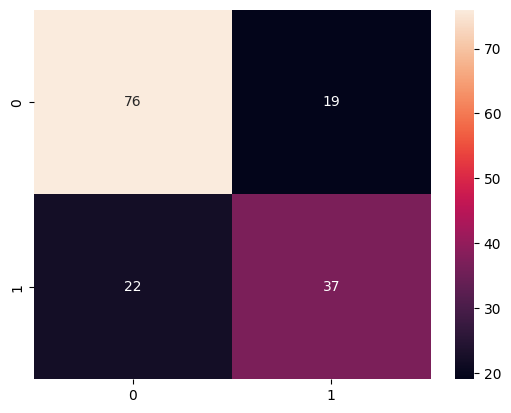

In [185]:
sns.heatmap(confusion_matrix(Y_test,nba_pred),annot=True,fmt="d")

In [165]:
auc=roc_auc_score(Y_test,nba_pred)
auc

0.7135593220338984

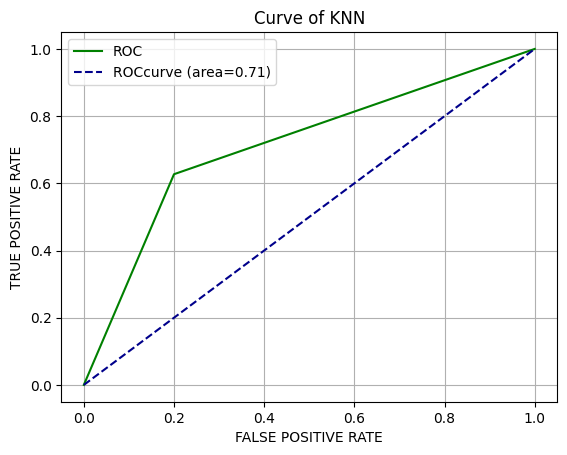

In [166]:
fpr,tpr,thresholds=roc_curve(Y_test,nba_pred)
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of KNN')
plt.legend()
plt.grid()
plt.show()


### For Decision tree classifier

In [121]:
# accuracy on train data set
acc_train=dst.score(X_train,Y_train)
print("acccuracy on train data set is : ",acc_train)


acccuracy on train data set is :  0.8436482084690554


In [122]:
# accuracy on test data set
acc_test=dst.score(X_test,Y_test)
print("acccuracy on test data set is : ",acc_test)

acccuracy on test data set is :  0.7662337662337663


In [123]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds=dst.predict(X_train)
mae=mean_absolute_error(Y_train,y_preds)
mae

0.1563517915309446

In [124]:
y_preds=dst.predict(X_test)
mae=mean_absolute_error(Y_test,y_preds)
mae

0.23376623376623376

In [125]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds=dst.predict(X_train)
mse=mean_squared_error(Y_train,y_preds)
mse


0.1563517915309446

In [126]:
y_preds=dst.predict(X_test)
mse=mean_squared_error(Y_test,y_preds)
mse

0.23376623376623376

In [127]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_decisiontree)
print(" precision on training data set is: ",precision_train)

 precision on training data set is:  0.7344398340248963


In [128]:
# precision on test data set
from sklearn.metrics import precision_score
precision_test=precision_score(Y_test,predicted_test_decisiontree)
print(" precision on test data set is: ",precision_test)

 precision on test data set is:  0.6825396825396826


In [129]:
# recall on training data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_decisiontree)
print(" recall on training data set is: ",recall_train)

 recall on training data set is:  0.84688995215311


In [130]:
# recall on test data set
from sklearn.metrics import recall_score
recall_test=precision_score(Y_test,predicted_test_decisiontree)
print(" recall on test data set is: ",recall_test)

 recall on test data set is:  0.6825396825396826


In [131]:
# f1 score on training data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_decisiontree)
print(" f1 on training data set is: ",f1_train)

 f1 on training data set is:  0.7866666666666666


In [132]:
# f1 score on test data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_test,predicted_test_decisiontree)
print(" f1 on test data set is: ",f1_train)

 f1 on test data set is:  0.7049180327868851


In [133]:
# AOC RUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_decisiontree)
print(" auc roc score on training set is: ",auc_score_train)

 auc roc score on training set is:  0.8444326303975427


In [134]:
#AOC RUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_decisiontree)
print(" auc roc score on test set is: ",auc_score_test)


 auc roc score on test set is:  0.75914362176628


In [167]:
dst_pred=nba.predict(X_test)
dst_pred.shape

(154,)

In [182]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,dst_pred)
cm

array([[76, 19],
       [22, 37]], dtype=int64)

<AxesSubplot:>

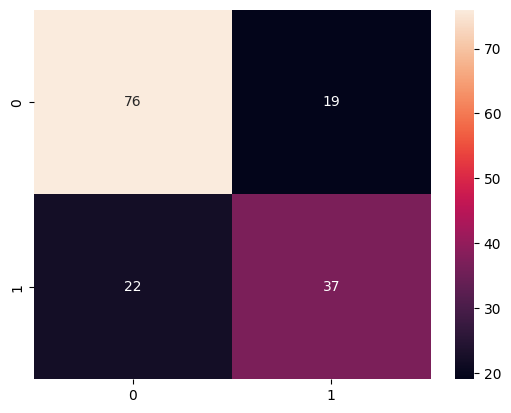

In [186]:
sns.heatmap(confusion_matrix(Y_test,dst_pred),annot=True,fmt="d")

In [168]:
auc=roc_auc_score(Y_test,dst_pred)
auc

0.7135593220338984

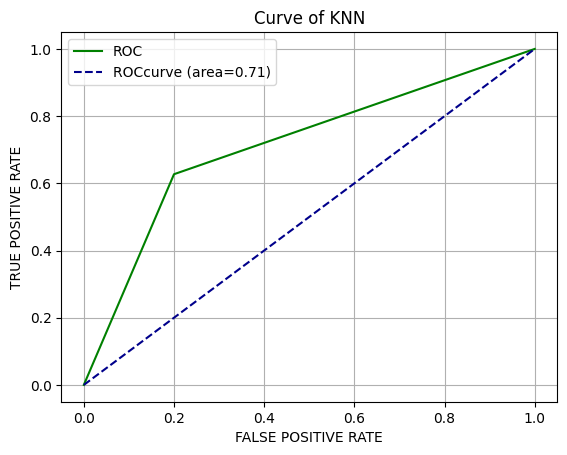

In [169]:
fpr,tpr,thresholds=roc_curve(Y_test,dst_pred)
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of KNN')
plt.legend()
plt.grid()
plt.show()


### For Random-Forest Classifier

In [135]:
# accuracy on train data set
acc_train=rf.score(X_train,Y_train)
print("acccuracy on train data set is : ",acc_train)

acccuracy on train data set is :  1.0


In [136]:
# accuracy on test data set
acc_test=rf.score(X_test,Y_test)
print("acccuracy on test data set is : ",acc_test)

acccuracy on test data set is :  0.7727272727272727


In [137]:
# mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds=rf.predict(X_train)
mae=mean_absolute_error(Y_train,y_preds)
mae

0.0

In [138]:
y_preds=rf.predict(X_test)
mae=mean_absolute_error(Y_test,y_preds)
mae

0.22727272727272727

In [139]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_preds=rf.predict(X_train)
mse=mean_squared_error(Y_train,y_preds)
mse


0.0

In [140]:
y_preds=dst.predict(X_test)
mse=mean_squared_error(Y_test,y_preds)
mse

0.23376623376623376

In [142]:
# precision on training data set
from sklearn.metrics import precision_score
precision_train=precision_score(Y_train,predicted_train_randomforest)
print(" precision on training data set is: ",precision_train)

 precision on training data set is:  1.0


In [143]:
# precision on test data set
from sklearn.metrics import precision_score
precision_test=precision_score(Y_test,predicted_test_randomforest)
print(" precision on test data set is: ",precision_test)

 precision on test data set is:  0.7727272727272727


In [144]:
# recall on training data set
from sklearn.metrics import recall_score
recall_train=recall_score(Y_train,predicted_train_randomforest)
print(" recall on training data set is: ",recall_train)

 recall on training data set is:  1.0


In [145]:
# recall on test data set
from sklearn.metrics import recall_score
recall_test=precision_score(Y_test,predicted_test_randomforest)
print(" recall on test data set is: ",recall_test)

 recall on test data set is:  0.7727272727272727


In [146]:
# f1 score on training data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_train,predicted_train_randomforest)
print(" f1 on training data set is: ",f1_train)

 f1 on training data set is:  1.0


In [147]:
# f1 score on test data set
from sklearn.metrics import f1_score
f1_train=f1_score(Y_test,predicted_test_randomforest)
print(" f1 on test data set is: ",f1_train)

 f1 on test data set is:  0.6601941747572816


In [148]:
# AOC RUC Score on training set
from sklearn.metrics import roc_auc_score
auc_score_train=roc_auc_score(Y_train,predicted_train_randomforest)
print(" auc roc score on training set is: ",auc_score_train)

 auc roc score on training set is:  1.0


In [149]:
#AOC RUC Score on test set
auc_score_test=roc_auc_score(Y_test,predicted_test_randomforest)
print(" auc roc score on test set is: ",auc_score_test)

 auc roc score on test set is:  0.7355040142729705


In [170]:
rf_pred=rf.predict(X_test)
rf_pred.shape

(154,)

In [184]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(Y_test,rf_pred)
cm

array([[85, 10],
       [25, 34]], dtype=int64)

<AxesSubplot:>

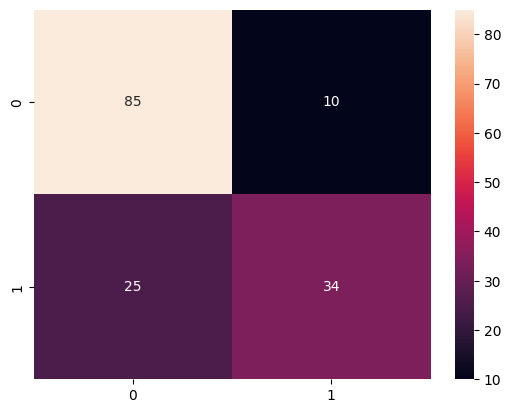

In [187]:
sns.heatmap(confusion_matrix(Y_test,rf_pred),annot=True,fmt="d")

In [171]:
auc=roc_auc_score(Y_test,rf_pred)
auc

0.7355040142729705

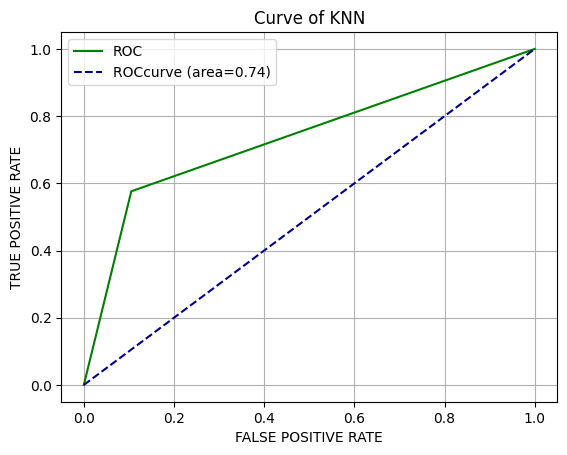

In [172]:
fpr,tpr,thresholds=roc_curve(Y_test,rf_pred)
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROCcurve (area=%0.2f)'%auc)
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Curve of KNN')
plt.legend()
plt.grid()
plt.show()


# Cross-validation

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [174]:
cvknn_train=cross_val_score(knn,X_train,Y_train, cv=10)
cvknn_train

array([0.70967742, 0.82258065, 0.82258065, 0.70967742, 0.73770492,
       0.78688525, 0.72131148, 0.70491803, 0.68852459, 0.75409836])

In [175]:
sum(cvknn_train)/10

0.7457958751983078

In [176]:
cvknn_test=cross_val_score(knn,X_test,Y_test,cv=10)
cvknn_test

array([0.75      , 0.75      , 0.75      , 0.875     , 0.8       ,
       0.73333333, 0.66666667, 0.66666667, 0.73333333, 0.86666667])

In [177]:
sum(cvknn_test)/10

0.7591666666666667

In [178]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    knn.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
    print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)



Training Accuracy Scores for Each Fold:
Fold 1: 0.8133140376266281

Testing Accuracy Scores for Each Fold:
Fold 2: 0.8060781476121563

Testing Accuracy Scores for Each Fold:
Fold 3: 0.8277858176555717

Testing Accuracy Scores for Each Fold:
Fold 4: 0.7988422575976846

Testing Accuracy Scores for Each Fold:
Fold 5: 0.8133140376266281

Testing Accuracy Scores for Each Fold:
Fold 6: 0.8075253256150506

Testing Accuracy Scores for Each Fold:
Fold 7: 0.8176555716353111

Testing Accuracy Scores for Each Fold:
Fold 8: 0.8031837916063675

Testing Accuracy Scores for Each Fold:
Fold 9: 0.815028901734104

Testing Accuracy Scores for Each Fold:
Fold 10: 0.7890173410404624

Testing Accuracy Scores for Each Fold:
Fold 1: 0.7142857142857143
Fold 2: 0.8051948051948052
Fold 3: 0.6233766233766234
Fold 4: 0.7922077922077922
Fold 5: 0.7012987012987013
Fold 6: 0.7142857142857143
Fold 7: 0.7532467532467533
Fold 8: 0.7532467532467533
Fold 9: 0.6578947368421053
Fold 10: 0.8157894736842105

Average Accuracy 

In [179]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    nba.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = nba.predict(x_test)
    y_pred_train = nba.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")

print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Training Accuracy Scores for Each Fold:
Fold 1: 0.76410998552822
Fold 2: 0.7597684515195369
Fold 3: 0.768451519536903
Fold 4: 0.7583212735166426
Fold 5: 0.7554269175108539
Fold 6: 0.7670043415340086
Fold 7: 0.7583212735166426
Fold 8: 0.7713458755426917
Fold 9: 0.7745664739884393
Fold 10: 0.7601156069364162

Testing Accuracy Scores for Each Fold:
Fold 1: 0.6883116883116883
Fold 2: 0.8181818181818182
Fold 3: 0.6883116883116883
Fold 4: 0.8311688311688312
Fold 5: 0.8181818181818182
Fold 6: 0.7012987012987013
Fold 7: 0.8441558441558441
Fold 8: 0.7272727272727273
Fold 9: 0.6710526315789473
Fold 10: 0.8026315789473685

Average Accuracy Training Score: 0.7637431719130354

Average Accuracy Testing Score: 0.7590567327409433


In [180]:
from sklearn import metrics
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize a list to store the accuracy scores
test_score = []
train_score = []

# Perform cross-validation
for train_index, test_index in k_folds.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    # Fit the model on the training data
    dst.fit(x_train, y_train)
    
    # Make predictions on the train and test data
    y_pred_test = dst.predict(x_test)
    y_pred_train = dst.predict(x_train)
    
    # Calculate the accuracy score for this fold
    accuracy_test = metrics.accuracy_score(y_pred_test,y_test)
    accuracy_train = metrics.accuracy_score(y_pred_train,y_train)
    
    # Store the accuracy score
    test_score.append(accuracy_test)
    train_score.append(accuracy_train)

# Print the accuracy scores for each fold
print("\nTraining Accuracy Scores for Each Fold:")
for fold, score in enumerate(train_score):
    print(f"Fold {fold+1}: {score}")
print("\nTesting Accuracy Scores for Each Fold:")
for fold, score in enumerate(test_score):
    print(f"Fold {fold+1}: {score}")
    
# Calculate and print the average accuracy score
average_accuracy_train = sum(train_score) / len(train_score)
print("\nAverage Accuracy Training Score:", average_accuracy_train)

average_accuracy_test = sum(test_score) / len(test_score)
print("\nAverage Accuracy Testing Score:", average_accuracy_test)


Training Accuracy Scores for Each Fold:
Fold 1: 0.8451519536903039
Fold 2: 0.8191027496382055
Fold 3: 0.8335745296671491
Fold 4: 0.8234442836468886
Fold 5: 0.8335745296671491
Fold 6: 0.8335745296671491
Fold 7: 0.8248914616497829
Fold 8: 0.8408104196816208
Fold 9: 0.8482658959537572
Fold 10: 0.8439306358381503

Testing Accuracy Scores for Each Fold:
Fold 1: 0.7662337662337663
Fold 2: 0.8051948051948052
Fold 3: 0.7272727272727273
Fold 4: 0.8051948051948052
Fold 5: 0.7792207792207793
Fold 6: 0.6623376623376623
Fold 7: 0.8051948051948052
Fold 8: 0.7532467532467533
Fold 9: 0.6842105263157895
Fold 10: 0.7894736842105263

Average Accuracy Training Score: 0.8346320989100156

Average Accuracy Testing Score: 0.7577580314422419
